**PREPROSSESSING -- Extracting SEA LEVEL PRESSURE DATA**

1. Need to regrid to match lfwc data (1x1 degree) -- *Complete*
2. Merge (command line) all years into individual member files (22 total) -- *Complete*
3. Extract 60N - all lon psl for arctic, all ensemble members, all years -- *Complete*
4. Testing use of 30N to see larger atm. circ pattern for slp -- *Complete*

v1. 22 February 2022

In [4]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
# from scipy import stats, integrate
import cmocean as cmo
import pandas as pd
import csv

In [5]:
base_dir = '/Volumes/PhD/CMIP6/Historical/EC-Earth3/slp/rg/'
vname = 'rg_psl_Amon_EC-Earth3_historical_r' 
t_yr = '_1950-2014.nc'

In [6]:
fn = base_dir + vname + '1' + t_yr
print(fn)
data = Dataset(fn)

/Volumes/PhD/CMIP6/Historical/EC-Earth3/slp/rg/rg_psl_Amon_EC-Earth3_historical_r1_1950-2014.nc


In [7]:
p1 = data.variables['psl'][:,:, :]

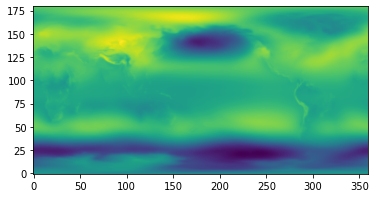

In [8]:
plt.imshow(p1[1,:,:], origin='lower')

In [30]:
ens_num = '25' # <--------------------------------------------------------------------- CHANGE THIS

base_dir = '/Volumes/PhD/CMIP6/Historical/EC-Earth3/slp/rg/'
vname = 'rg_psl_Amon_EC-Earth3_historical_r' 

end_dir = '/Volumes/PhD/CMIP6/Historical/EC-Earth3/slp/monthly/'
fname = 'monthly_psl_EC-Earth3_historical_r'
so_suffix = '_1950-2014_30n.nc'

file = base_dir + vname + ens_num + t_yr
psl_fn = end_dir + fname + ens_num + so_suffix

print(file)
ncfile = Dataset(psl_fn, mode='w', format='NETCDF4_CLASSIC');
# --------------------------------------------------------------------------------------------------------------
mdl_data = Dataset(file)
mdl_lat = mdl_data.variables['lat'][-60:]
mdl_lon = mdl_data.variables['lon'][:]
mdl_psl = mdl_data.variables['psl'][:,-60:,:] # time, level/depth, lat, lon

lat_dim = ncfile.createDimension('lat', 60) # latitude axis
lon_dim = ncfile.createDimension('lon', 360) # longitude axis
tidx_dim = ncfile.createDimension('tidx', None) # unlimited axis (can be appended to).

lat = ncfile.createVariable('lat', np.float64, ('lat','lon'))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float64, ('lat', 'lon'))
lon.units = 'degrees_east'
lon.long_name = 'longitude'
tidx = ncfile.createVariable('tidx', np.float32, ('tidx',))
tidx.long_name = 'time_index'
psl = ncfile.createVariable('psl', np.float64,('tidx', 'lat', 'lon'))
psl.units = 'Pa'
psl.standard_name = 'sea level pressure'

psl[:,:,:] = mdl_psl[:,:,:]
# lat[:,:] = mdl_lat[:]
# lon[:,:] = mdl_lon[:]

ncfile.close(); 

/Volumes/PhD/CMIP6/Historical/EC-Earth3/slp/rg/rg_psl_Amon_EC-Earth3_historical_r25_1950-2014.nc


---
Check psl data output for just Arctic region (60N, all lons)

97348.6171875 104640.3515625 101422.71224766664


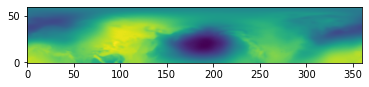

In [32]:
end_dir = '/Volumes/PhD/CMIP6/Historical/EC-Earth3/slp/monthly/'
f = 'monthly_psl_EC-Earth3_historical_r2_1950-2014_30n.nc'
data = Dataset(end_dir + f)

p1 = data.variables['psl'][:]
p1.shape

plt.imshow(p1[0], origin='lower');

print(np.min(p1), np.max(p1), np.mean(p1))

---
1. Extract JJA slp 
2. Export time series and map .nc files

In [33]:
fwc_dir = '../DATA/EC-fwc/'

mdl_data = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r1_1950-2014_30n.nc')
mdl_data2 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r2_1950-2014_30n.nc')
mdl_data3 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r3_1950-2014_30n.nc')
mdl_data4 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r4_1950-2014_30n.nc')
mdl_data6 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r6_1950-2014_30n.nc')
mdl_data7 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r7_1950-2014_30n.nc')
mdl_data9 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r9_1950-2014_30n.nc')
mdl_data10 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r10_1950-2014_30n.nc')
mdl_data11 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r11_1950-2014_30n.nc')
mdl_data12 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r12_1950-2014_30n.nc')
mdl_data13 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r13_1950-2014_30n.nc')
mdl_data14 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r14_1950-2014_30n.nc')
mdl_data15 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r15_1950-2014_30n.nc')
mdl_data16 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r16_1950-2014_30n.nc')
mdl_data17 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r17_1950-2014_30n.nc')
mdl_data18 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r18_1950-2014_30n.nc')
mdl_data19 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r19_1950-2014_30n.nc')
# mdl_data20 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r20_1950-2014.nc')
mdl_data21 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r21_1950-2014_30n.nc')
mdl_data22 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r22_1950-2014_30n.nc')
mdl_data23 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r23_1950-2014_30n.nc')
mdl_data24 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r24_1950-2014_30n.nc')
mdl_data25 = Dataset(fwc_dir + 'monthly_psl_EC-Earth3_historical_r25_1950-2014_30n.nc')

In [34]:
p1 = mdl_data.variables['psl'][:,:,:]
p2 = mdl_data2.variables['psl'][:,:,:]
p3 = mdl_data3.variables['psl'][:,:,:]
p4 = mdl_data4.variables['psl'][:,:,:]
p6 = mdl_data6.variables['psl'][:,:,:]
p7 = mdl_data7.variables['psl'][:,:,:]
p9 = mdl_data9.variables['psl'][:,:,:]
p10 = mdl_data10.variables['psl'][:,:,:]
p11 = mdl_data11.variables['psl'][:,:,:]
p12 = mdl_data12.variables['psl'][:,:,:]
p13 = mdl_data13.variables['psl'][:,:,:]
p14 = mdl_data14.variables['psl'][:,:,:]
p15 = mdl_data15.variables['psl'][:,:,:]
p16 = mdl_data16.variables['psl'][:,:,:]
p17 = mdl_data17.variables['psl'][:,:,:]
p18 = mdl_data18.variables['psl'][:,:,:]
p19 = mdl_data19.variables['psl'][:,:,:]
# p20 = mdl_data20.variables['psl'][:,:,:]
p21 = mdl_data21.variables['psl'][:,:,:]
p22 = mdl_data22.variables['psl'][:,:,:]
p23 = mdl_data23.variables['psl'][:,:,:]
p24 = mdl_data24.variables['psl'][:,:,:]
p25 = mdl_data25.variables['psl'][:,:,:]

In [35]:
p1_6 = p1[5::12] # jun
p1_7 = p1[6::12]
p1_8 = p1[7::12]

p2_6 = p2[5::12] # jun
p2_7 = p2[6::12]
p2_8 = p2[7::12]

p3_6 = p3[5::12] # jun
p3_7 = p3[6::12]
p3_8 = p3[7::12]

p4_6 = p4[5::12] # jun
p4_7 = p4[6::12]
p4_8 = p4[7::12]

p6_6 = p6[5::12] # jun
p6_7 = p6[6::12]
p6_8 = p6[7::12]

p7_6 = p7[5::12] # jun
p7_7 = p7[6::12]
p7_8 = p7[7::12]

p9_6 = p9[5::12] # jun
p9_7 = p9[6::12]
p9_8 = p9[7::12]

p10_6 = p10[5::12] # jun
p10_7 = p10[6::12]
p10_8 = p10[7::12]

p11_6 = p11[5::12] # jun
p11_7 = p11[6::12]
p11_8 = p11[7::12]

p12_6 = p12[5::12] # jun
p12_7 = p12[6::12]
p12_8 = p12[7::12]

p13_6 = p13[5::12] # jun
p13_7 = p13[6::12]
p13_8 = p13[7::12]

p14_6 = p14[5::12] # jun
p14_7 = p14[6::12]
p14_8 = p14[7::12]

p15_6 = p15[5::12] # jun
p15_7 = p15[6::12]
p15_8 = p15[7::12]

p16_6 = p16[5::12] # jun
p16_7 = p16[6::12]
p16_8 = p16[7::12]

p17_6 = p17[5::12] # jun
p17_7 = p17[6::12]
p17_8 = p17[7::12]

p18_6 = p18[5::12] # jun
p18_7 = p18[6::12]
p18_8 = p18[7::12]

p19_6 = p19[5::12] # jun
p19_7 = p19[6::12]
p19_8 = p19[7::12]

# p20_6 = p20[5::12] # jun
# p20_7 = p20[6::12]
# p20_8 = p20[7::12]

p21_6 = p21[5::12] # jun
p21_7 = p21[6::12]
p21_8 = p21[7::12]

p22_6 = p22[5::12] # jun
p22_7 = p22[6::12]
p22_8 = p22[7::12]

p23_6 = p23[5::12] # jun
p23_7 = p23[6::12]
p23_8 = p23[7::12]

p24_6 = p24[5::12] # jun
p24_7 = p24[6::12]
p24_8 = p24[7::12]

p25_6 = p25[5::12] # jun
p25_7 = p25[6::12]
p25_8 = p25[7::12]

In [36]:
# Spatially averaged JJA slp
p1_JJA = np.mean([p1_6, p1_7, p1_8], axis=0)
p2_JJA = np.mean([p2_6, p2_7, p2_8], axis=0)
p3_JJA = np.mean([p3_6, p3_7, p3_8], axis=0)
p4_JJA = np.mean([p4_6, p4_7, p4_8], axis=0)
p6_JJA = np.mean([p6_6, p6_7, p6_8], axis=0)
p7_JJA = np.mean([p7_6, p7_7, p7_8], axis=0)
p9_JJA = np.mean([p9_6, p9_7, p9_8], axis=0)
p10_JJA = np.mean([p10_6, p10_7, p10_8], axis=0)
p11_JJA = np.mean([p11_6, p11_7, p11_8], axis=0)
p12_JJA = np.mean([p12_6, p12_7, p12_8], axis=0)
p13_JJA = np.mean([p13_6, p13_7, p13_8], axis=0)
p14_JJA = np.mean([p14_6, p14_7, p14_8], axis=0)
p15_JJA = np.mean([p15_6, p15_7, p15_8], axis=0)
p16_JJA = np.mean([p16_6, p16_7, p16_8], axis=0)
p17_JJA = np.mean([p17_6, p17_7, p17_8], axis=0)
p18_JJA = np.mean([p18_6, p18_7, p18_8], axis=0)
p19_JJA = np.mean([p19_6, p19_7, p19_8], axis=0)
# p20_JJA = np.mean([p20_6, p20_7, p20_8], axis=0)
p21_JJA = np.mean([p21_6, p21_7, p21_8], axis=0)
p22_JJA = np.mean([p22_6, p22_7, p22_8], axis=0)
p23_JJA = np.mean([p23_6, p23_7, p23_8], axis=0)
p24_JJA = np.mean([p24_6, p24_7, p24_8], axis=0)
p25_JJA = np.mean([p25_6, p25_7, p25_8], axis=0)

In [37]:
# Time averaged JJA slp
p1_JJA_ts = np.average(p1_JJA, axis=(1,2))
p2_JJA_ts = np.average(p2_JJA, axis=(1,2))
p3_JJA_ts = np.average(p3_JJA, axis=(1,2))
p4_JJA_ts = np.average(p4_JJA, axis=(1,2))
p6_JJA_ts = np.average(p6_JJA, axis=(1,2))
p7_JJA_ts = np.average(p7_JJA, axis=(1,2))
p9_JJA_ts = np.average(p9_JJA, axis=(1,2))
p10_JJA_ts = np.average(p10_JJA, axis=(1,2))
p11_JJA_ts = np.average(p11_JJA, axis=(1,2))
p12_JJA_ts = np.average(p12_JJA, axis=(1,2))
p13_JJA_ts = np.average(p13_JJA, axis=(1,2))
p14_JJA_ts = np.average(p14_JJA, axis=(1,2))
p15_JJA_ts = np.average(p15_JJA, axis=(1,2))
p16_JJA_ts = np.average(p16_JJA, axis=(1,2))
p17_JJA_ts = np.average(p17_JJA, axis=(1,2))
p18_JJA_ts = np.average(p18_JJA, axis=(1,2))
p19_JJA_ts = np.average(p19_JJA, axis=(1,2))
# p20_JJA_ts = np.average(p20_JJA, axis=(1,2))
p21_JJA_ts = np.average(p21_JJA, axis=(1,2))
p22_JJA_ts = np.average(p22_JJA, axis=(1,2))
p23_JJA_ts = np.average(p23_JJA, axis=(1,2))
p24_JJA_ts = np.average(p24_JJA, axis=(1,2))
p25_JJA_ts = np.average(p25_JJA, axis=(1,2))

In [38]:
fwc_dir = '../DATA/EC-fwc/'
psl_jja_TS = fwc_dir + 'jja_psl_allens_allgroups_TIMESERIES_30n.nc' # domain-averaged time series (1950-2014)
ncfile_TS = Dataset(psl_jja_TS, mode='w', format='NETCDF4_CLASSIC')

# TIME SERIES ------------------------------------------------------------------------------------------------------
tidx_dim = ncfile_TS.createDimension('tidx', None) # unlimited axis (can be appended to).

ensmean = ncfile_TS.createVariable('ens_mean', np.float32, ('tidx',))
ensmean.long_name = 'ensemble mean JJA slp'
ensmean.units = 'Pa'

fast = ncfile_TS.createVariable('fast_mean', np.float32, ('tidx',))
fast.long_name = 'fast group mean JJA slp 3 member'
fast.units = 'Pa'

slow = ncfile_TS.createVariable('slow_mean', np.float32, ('tidx',))
slow.long_name = 'slow group mean JJA slp 4 member'
slow.units = 'Pa'

ens1 = ncfile_TS.createVariable('ens1', np.float32, ('tidx',))
ens1.long_name = 'ensemble member 1 JJA slp'
ens1.units = 'Pa'

ens2 = ncfile_TS.createVariable('ens2', np.float32, ('tidx',))
ens2.long_name = 'ensemble member 2 JJA slp'
ens2.units = 'Pa'

ens3 = ncfile_TS.createVariable('ens3', np.float32, ('tidx',))
ens3.long_name = 'ensemble member 3 JJA slp'
ens3.units = 'Pa'

ens4 = ncfile_TS.createVariable('ens4', np.float32, ('tidx',))
ens4.long_name = 'ensemble member 4 JJA slp'
ens4.units = 'Pa'

ens6 = ncfile_TS.createVariable('ens6', np.float32, ('tidx',))
ens6.long_name = 'ensemble member 6 JJA slp'
ens6.units = 'Pa'

ens7 = ncfile_TS.createVariable('ens7', np.float32, ('tidx',))
ens7.long_name = 'ensemble member 7 JJA slp'
ens7.units = 'Pa'

ens9 = ncfile_TS.createVariable('ens9', np.float32, ('tidx',))
ens9.long_name = 'ensemble member 9 JJA slp'
ens9.units = 'Pa'

ens10 = ncfile_TS.createVariable('ens10', np.float32, ('tidx',))
ens10.long_name = 'ensemble member 10 JJA slp'
ens10.units = 'Pa'

ens11 = ncfile_TS.createVariable('ens11', np.float32, ('tidx',))
ens11.long_name = 'ensemble member 11 JJA slp'
ens11.units = 'Pa'

ens12 = ncfile_TS.createVariable('ens12', np.float32, ('tidx',))
ens12.long_name = 'ensemble member 12 JJA slp'
ens12.units = 'Pa'

ens13 = ncfile_TS.createVariable('ens13', np.float32, ('tidx',))
ens13.long_name = 'ensemble member 13 JJA slp'
ens13.units = 'Pa'

ens14 = ncfile_TS.createVariable('ens14', np.float32, ('tidx',))
ens14.long_name = 'ensemble member 14 JJA slp'
ens14.units = 'Pa'

ens15 = ncfile_TS.createVariable('ens15', np.float32, ('tidx',))
ens15.long_name = 'ensemble member 15 JJA slp'
ens15.units = 'Pa'

ens16 = ncfile_TS.createVariable('ens16', np.float32, ('tidx',))
ens16.long_name = 'ensemble member 16 JJA slp'
ens16.units = 'Pa'

ens17 = ncfile_TS.createVariable('ens17', np.float32, ('tidx',))
ens17.long_name = 'ensemble member 17 JJA slp'
ens17.units = 'Pa'

ens18 = ncfile_TS.createVariable('ens18', np.float32, ('tidx',))
ens18.long_name = 'ensemble member 18 JJA slp'
ens18.units = 'Pa'

ens19 = ncfile_TS.createVariable('ens19', np.float32, ('tidx',))
ens19.long_name = 'ensemble member 19 JJA slp'
ens19.units = 'Pa'

# ens20 = ncfile_TS.createVariable('ens20', np.float32, ('tidx',))
# ens20.long_name = 'ensemble member 20 JJA slp'
# ens20.units = 'Pa'

ens21 = ncfile_TS.createVariable('ens21', np.float32, ('tidx',))
ens21.long_name = 'ensemble member 21 JJA slp'
ens21.units = 'Pa'

ens22 = ncfile_TS.createVariable('ens22', np.float32, ('tidx',))
ens22.long_name = 'ensemble member 22 JJA slp'
ens22.units = 'Pa'

ens23 = ncfile_TS.createVariable('ens23', np.float32, ('tidx',))
ens23.long_name = 'ensemble member 23 JJA slp'
ens23.units = 'Pa'

ens24 = ncfile_TS.createVariable('ens24', np.float32, ('tidx',))
ens24.long_name = 'ensemble member 24 JJA slp'
ens24.units = 'Pa'

ens25 = ncfile_TS.createVariable('ens25', np.float32, ('tidx',))
ens25.long_name = 'ensemble member 25 JJA slp'
ens25.units = 'Pa'


# Defining variables -------------------------------------------------------------------------------------------------

ensemb_mean = np.mean([p1_JJA_ts, p2_JJA_ts, p3_JJA_ts, p4_JJA_ts, p6_JJA_ts, p7_JJA_ts, 
           p9_JJA_ts, p10_JJA_ts, p11_JJA_ts, p12_JJA_ts, p13_JJA_ts, p14_JJA_ts,
            p15_JJA_ts, p16_JJA_ts, p17_JJA_ts, p18_JJA_ts, p19_JJA_ts, 
           p21_JJA_ts, p22_JJA_ts, p23_JJA_ts, p24_JJA_ts, p25_JJA_ts], axis=0)

slowgroup = np.mean([p10_JJA_ts, p17_JJA_ts, p18_JJA_ts, p25_JJA_ts], axis=0)

fastgroup = np.mean([p7_JJA_ts, p14_JJA_ts, p21_JJA_ts], axis = 0)


# Saving variables -------------------------------------------------------------------------------------------------
ensmean[:] = ensemb_mean[:]
fast[:] = fastgroup[:]
slow[:] = slowgroup[:]

ens1[:] = p1_JJA_ts[:]
ens2[:] = p2_JJA_ts[:]
ens3[:] = p3_JJA_ts[:]
ens4[:] = p4_JJA_ts[:]
ens6[:] = p6_JJA_ts[:]
ens7[:] = p7_JJA_ts[:]
ens9[:] = p9_JJA_ts[:]
ens10[:] = p10_JJA_ts[:]
ens11[:] = p11_JJA_ts[:]
ens12[:] = p12_JJA_ts[:]
ens13[:] = p13_JJA_ts[:]
ens14[:] = p14_JJA_ts[:]
ens15[:] = p15_JJA_ts[:]
ens16[:] = p16_JJA_ts[:]
ens17[:] = p17_JJA_ts[:]
ens18[:] = p18_JJA_ts[:]
ens19[:] = p19_JJA_ts[:]
# ens20[:] = p20_JJA_ts[:]
ens21[:] = p21_JJA_ts[:]
ens22[:] = p22_JJA_ts[:]
ens23[:] = p23_JJA_ts[:]
ens24[:] = p24_JJA_ts[:]
ens25[:] = p25_JJA_ts[:]

ncfile_TS.close();

In [39]:
fwc_dir = '../DATA/EC-fwc/'
psl_jja_MAP = fwc_dir + 'jja_psl_allens_allgroups_MAP_30n.nc' # domain-averaged time series (1950-2014)
ncfile_MAP = Dataset(psl_jja_MAP, mode='w', format='NETCDF4_CLASSIC')

# SPATIAL MAP ------------------------------------------------------------------------------------------------------
lat_dim = ncfile_MAP.createDimension('lat', 60) # latitude axis
lon_dim = ncfile_MAP.createDimension('lon', 360) # longitude axis
tidx_dim = ncfile_MAP.createDimension('tidx', None) # unlimited axis (can be appended to).

lat = ncfile_MAP.createVariable('lat', np.float64, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'

lon = ncfile_MAP.createVariable('lon', np.float64, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'

ensmean = ncfile_MAP.createVariable('ens_mean', np.float64,('tidx', 'lat', 'lon'))
ensmean.long_name = 'ensemble mean JJA slp'
ensmean.units = 'Pa'

fast = ncfile_MAP.createVariable('fast_mean', np.float64,('tidx', 'lat', 'lon'))
fast.long_name = 'fast group mean JJA slp 3 member'
fast.units = 'Pa'

slow = ncfile_MAP.createVariable('slow_mean', np.float64,('tidx', 'lat', 'lon'))
slow.long_name = 'slow group mean JJA slp 4 member'
slow.units = 'Pa'

ens1 = ncfile_MAP.createVariable('ens1', np.float64,('tidx', 'lat', 'lon'))
ens1.long_name = 'ensemble member 1 JJA slp'
ens1.units = 'Pa'

ens2 = ncfile_MAP.createVariable('ens2', np.float64,('tidx', 'lat', 'lon'))
ens2.long_name = 'ensemble member 2 JJA slp'
ens2.units = 'Pa'

ens3 = ncfile_MAP.createVariable('ens3', np.float64,('tidx', 'lat', 'lon'))
ens3.long_name = 'ensemble member 3 JJA slp'
ens3.units = 'Pa'

ens4 = ncfile_MAP.createVariable('ens4', np.float64,('tidx', 'lat', 'lon'))
ens4.long_name = 'ensemble member 4 JJA slp'
ens4.units = 'Pa'

ens6 = ncfile_MAP.createVariable('ens6', np.float64,('tidx', 'lat', 'lon'))
ens6.long_name = 'ensemble member 6 JJA slp'
ens6.units = 'Pa'

ens7 = ncfile_MAP.createVariable('ens7', np.float64,('tidx', 'lat', 'lon'))
ens7.long_name = 'ensemble member 7 JJA slp'
ens7.units = 'Pa'

ens9 = ncfile_MAP.createVariable('ens9', np.float64,('tidx', 'lat', 'lon'))
ens9.long_name = 'ensemble member 9 JJA slp'
ens9.units = 'Pa'

ens10 = ncfile_MAP.createVariable('ens10', np.float64,('tidx', 'lat', 'lon'))
ens10.long_name = 'ensemble member 10 JJA slp'
ens10.units = 'Pa'

ens11 = ncfile_MAP.createVariable('ens11', np.float64,('tidx', 'lat', 'lon'))
ens11.long_name = 'ensemble member 11 JJA slp'
ens11.units = 'Pa'

ens12 = ncfile_MAP.createVariable('ens12', np.float64,('tidx', 'lat', 'lon'))
ens12.long_name = 'ensemble member 12 JJA slp'
ens12.units = 'Pa'

ens13 = ncfile_MAP.createVariable('ens13', np.float64,('tidx', 'lat', 'lon'))
ens13.long_name = 'ensemble member 13 JJA slp'
ens13.units = 'Pa'

ens14 = ncfile_MAP.createVariable('ens14', np.float64,('tidx', 'lat', 'lon'))
ens14.long_name = 'ensemble member 14 JJA slp'
ens14.units = 'Pa'

ens15 = ncfile_MAP.createVariable('ens15', np.float64,('tidx', 'lat', 'lon'))
ens15.long_name = 'ensemble member 15 JJA slp'
ens15.units = 'Pa'

ens16 = ncfile_MAP.createVariable('ens16', np.float64,('tidx', 'lat', 'lon'))
ens16.long_name = 'ensemble member 16 JJA slp'
ens16.units = 'Pa'

ens17 = ncfile_MAP.createVariable('ens17', np.float64,('tidx', 'lat', 'lon'))
ens17.long_name = 'ensemble member 17 JJA slp'
ens17.units = 'Pa'

ens18 = ncfile_MAP.createVariable('ens18', np.float64,('tidx', 'lat', 'lon'))
ens18.long_name = 'ensemble member 18 JJA slp'
ens18.units = 'Pa'

ens19 = ncfile_MAP.createVariable('ens19', np.float64,('tidx', 'lat', 'lon'))
ens19.long_name = 'ensemble member 19 JJA slp'
ens19.units = 'Pa'

# ens20 = ncfile_MAP.createVariable('ens20', np.float64,('tidx', 'lat', 'lon'))
# ens20.long_name = 'ensemble member 20 JJA slp'
# ens20.units = 'Pa'

ens21 = ncfile_MAP.createVariable('ens21', np.float64,('tidx', 'lat', 'lon'))
ens21.long_name = 'ensemble member 21 JJA slp'
ens21.units = 'Pa'

ens22 = ncfile_MAP.createVariable('ens22', np.float64,('tidx', 'lat', 'lon'))
ens22.long_name = 'ensemble member 22 JJA slp'
ens22.units = 'Pa'

ens23 = ncfile_MAP.createVariable('ens23', np.float64,('tidx', 'lat', 'lon'))
ens23.long_name = 'ensemble member 23 JJA slp'
ens23.units = 'Pa'

ens24 = ncfile_MAP.createVariable('ens24', np.float64,('tidx', 'lat', 'lon'))
ens24.long_name = 'ensemble member 24 JJA slp'
ens24.units = 'Pa'

ens25 = ncfile_MAP.createVariable('ens25', np.float64,('tidx', 'lat', 'lon'))
ens25.long_name = 'ensemble member 25 JJA slp'
ens25.units = 'Pa'


# Defining variables -------------------------------------------------------------------------------------------------

ensemb_mean = np.mean([p1_JJA, p2_JJA, p3_JJA, p4_JJA, p6_JJA, p7_JJA, 
           p9_JJA, p10_JJA, p11_JJA, p12_JJA, p13_JJA, p14_JJA,
            p15_JJA, p16_JJA, p17_JJA, p18_JJA, p19_JJA, #p20_JJA, 
           p21_JJA, p22_JJA, p23_JJA, p24_JJA, p25_JJA], axis=0) 

slowgroup = np.mean([p10_JJA, p17_JJA, p18_JJA, p25_JJA], axis=0)

fastgroup = np.mean([p7_JJA, p14_JJA, p21_JJA], axis=0)

# Saving variables -------------------------------------------------------------------------------------------------
ensmean[:] = ensemb_mean[:]
fast[:] = fastgroup[:]
slow[:] = slowgroup[:]

ens1[:] = p1_JJA[:]
ens2[:] = p2_JJA[:]
ens3[:] = p3_JJA[:]
ens4[:] = p4_JJA[:]
ens6[:] = p6_JJA[:]
ens7[:] = p7_JJA[:]
ens9[:] = p9_JJA[:]
ens10[:] = p10_JJA[:]
ens11[:] = p11_JJA[:]
ens12[:] = p12_JJA[:]
ens13[:] = p13_JJA[:]
ens14[:] = p14_JJA[:]
ens15[:] = p15_JJA[:]
ens16[:] = p16_JJA[:]
ens17[:] = p17_JJA[:]
ens18[:] = p18_JJA[:]
ens19[:] = p19_JJA[:]
# ens20[:] = p20_JJA[:]
ens21[:] = p21_JJA[:]
ens22[:] = p22_JJA[:]
ens23[:] = p23_JJA[:]
ens24[:] = p24_JJA[:]
ens25[:] = p25_JJA[:]

ncfile_MAP.close();